<a href="https://colab.research.google.com/github/prabirdeb/Automated-Question-Answering-System/blob/main/Automated_Question_Answering_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Automated Question-Answering**

## <b> Problem Description </b>

### In this project, at first our task is to create a dataset of datascience documents and then extract the topics of the documents and finally build a automated question answering model which will  retrieve the relevant document and generate the answer for the question

# **Exploration and Pre-processing of Data**

This involves following steps to transform raw data into quality data for the deep learning model 

## **1. Connection with the Data**

Here, the dataset is the gist of my learning experiences in Almabetter stored in an excel file.

At first, we import the libraries or functions for **making our journey easy** and then **get connected** to the set of experiences.

In [206]:
# Importing libraries

# Data handling
import numpy as np
import pandas as pd

# machine learning
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Text processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [207]:
# Importing deep learning libraries

In [208]:
# !pip install streamlit

In [209]:
!pip install transformers

In [210]:
from transformers import pipeline
ques_ans_pipeline = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


In [211]:
!pip install pyLDAvis

In [212]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [213]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [214]:
# Reading the data as pandas dataframe
xls = pd.ExcelFile('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/Automated Question Answering System-Prabir Debnath/data.xlsx')
xls.sheet_names

['Concepts']

In [215]:
data_science_df = pd.read_excel(xls, 'Concepts')

## **2. First Feelings of the Data**

As there is a huge no. of experiences, we cannot see the whole lot of experiences and therefore we find the features on the **data head**.

In [216]:
data_science_df.head(2)

,Concept-1,Concept-2,Concept-3,Concept-4,Concept-5,Concept-6,Concept-7,Concept-8,Concept-9,Concept-10,...,Concept-12,Concept-13,Concept-14,Concept-15,Concept-16,Concept-17,Concept-18,Concept-19,Concept-20,Unnamed: 20
0,Python language was created in 1991\n\nLike an...,There are 32 keywords in C++ and 35 keywords i...,"data types (Numeric, Boolean, String, Datetime)","Integers or whole numbers (1,2,-5,1000), Float...","Arithmatic Operation (addition[+], subtraction...","In mathematics and computer science, the floor...",Variable is the storing place in computer memo...,Variable name (must start with letter or under...,Boolean Variable (true or false)\n\nComparison...,"Perfect number, a positive integer that is equ...",...,To get the absolute value\n\nabs(5.8-7.8) retu...,The del keyword in python is primarily used to...,What is the order of precedence in python?\n\n...,int(True) gives result 1 and int(False) gives 0,An application or app or software or model is ...,"a += 2 means first add 2 with ""a"" and then sav...","Four basic answers of any question\n\nyes, no,...",\nlogical resoning\n\nStatement: Is buying thi...,The pprint module provides a capability to “pr...,NaN
1,"String can be a word, a phrase, a sentence, a ...",String has sequence and thus indexing,"string' or ""string"" \n\ndouble quotes are used...",print('Use \n to print a new line'),string indexing begins from 0,Grabbing the element by index \n\nprint(string...,"String Slicing, \n\n[starting index:ending ind...",string[:] If you do not specify the starting ...,"slicing with step size, string[3:14:2] means f...",str' object does not support item assignment m...,...,"String functions, print(), type(), len()\n\nor...","String methods \n\nstring.lower(), string.uppe...",first_name = 'Rahul'\nlast_name = 'Modi'\n\nfu...,my_string = 'Albert Einstein' \n\n'Albert' i...,String duplication occurs when we multiply str...,Taking user's input\n\ninputted_number = int(i...,\n\nA string can be called a safe bridge if it...,for color print\n\nfrom termcolor import color...,String matching\n\nimport re\n pattern = re.co...,NaN


## **3. Deeper Understanding of the Data**

As there is a huge no. of experiences, we take the help of **statistics to measure** each and every features in different dimensions.

In [217]:
data_science_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Concept-1    99 non-null     object
 1   Concept-2    94 non-null     object
 2   Concept-3    94 non-null     object
 3   Concept-4    92 non-null     object
 4   Concept-5    92 non-null     object
 5   Concept-6    87 non-null     object
 6   Concept-7    86 non-null     object
 7   Concept-8    86 non-null     object
 8   Concept-9    83 non-null     object
 9   Concept-10   80 non-null     object
 10  Concept-11   75 non-null     object
 11  Concept-12   70 non-null     object
 12  Concept-13   64 non-null     object
 13  Concept-14   58 non-null     object
 14  Concept-15   54 non-null     object
 15  Concept-16   44 non-null     object
 16  Concept-17   40 non-null     object
 17  Concept-18   37 non-null     object
 18  Concept-19   30 non-null     object
 19  Concept-20   23 non-null     ob

## **4. Cleaning the Data**

In this step, we treat null, missing, "?" or duplicate values.

We check the statistics further on clean data.

Creating Dataset with Relevant Features

In [218]:
relevant_features=['Concept-1', 'Concept-2', 'Concept-3', 'Concept-4', 'Concept-5',
       'Concept-6', 'Concept-7', 'Concept-8', 'Concept-9', 'Concept-10',
       'Concept-11', 'Concept-12', 'Concept-13', 'Concept-14', 'Concept-15',
       'Concept-16', 'Concept-17', 'Concept-18', 'Concept-19', 'Concept-20']

In [219]:
data_science_df_clean=data_science_df[relevant_features]

In [220]:
# Creating documents with all individual cell
data_science_df_clean=pd.DataFrame(data_science_df_clean.values.flatten(), columns=['documents'])
data_science_df_clean.head(2)

,documents
0,Python language was created in 1991\n\nLike an...
1,There are 32 keywords in C++ and 35 keywords i...


In [221]:
# Removing null value rows
data_science_df_clean.dropna(inplace=True) 

In [222]:
data_science_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1971
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   documents  1388 non-null   object
dtypes: object(1)
memory usage: 21.7+ KB


In [223]:
# Checking no data in any row
data_science_df_clean[(data_science_df_clean['documents']=='No data')]

,documents
480,No data
760,No data
1300,No data
1320,No data
1420,No data


In [224]:
# Removing all the rows with no data and reseting index 
data_science_df_clean=data_science_df_clean[(data_science_df_clean['documents']!='No data')].reset_index()

In [225]:
data_science_df_clean.drop('index',axis=1, inplace=True)

In [226]:
data_science_df_clean['documents']

0       Python language was created in 1991\n\nLike an...
1       There are 32 keywords in C++ and 35 keywords i...
2         data types (Numeric, Boolean, String, Datetime)
3       Integers or whole numbers (1,2,-5,1000), Float...
4       Arithmatic Operation (addition[+], subtraction...
                              ...                        
1378    Attention model\n\nFor long sequence normal ma...
1379    Blue Score\n\nIt is used to measure the perfor...
1380    Audio data for speech recognition\n\nThis is a...
1381    Basic Rule of CTC based technique\n\nCollapse ...
1382    Audio Data for Trigger word detection\n\ne.g. ...
Name: documents, Length: 1383, dtype: object

Let's develop a list of the top words used across the documents, which gives us a glimpse into the core vocabulary of the source data. Stop words are omitted here to avoid any trivial conjunctions, prepositions, etc.

Text Pre-processing

In [227]:
# writing text pre-processing function
def text_process(text):
    text = text.lower()    # converting to lowercase
    text =[char for char in text if char not in string.punctuation] # removing punctuations
    text=''.join(text) 
    text=[word for word in text.split() if word not in stopwords.words('english')]  # removing stopwords
    stemmer = SnowballStemmer("english") 
    text=' '.join(text) 
    text = [stemmer.stem(word) for word in text.split()] # stemming operation
    return ' '.join(text)

In [228]:
text_process('I am Running in the field')

'run field'

In [229]:
# Wrting top words function
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_documents = count_vectorizer.fit_transform(text_data.apply(text_process).values) # also performing text processing
    vectorized_total = np.sum(vectorized_documents, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_documents.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

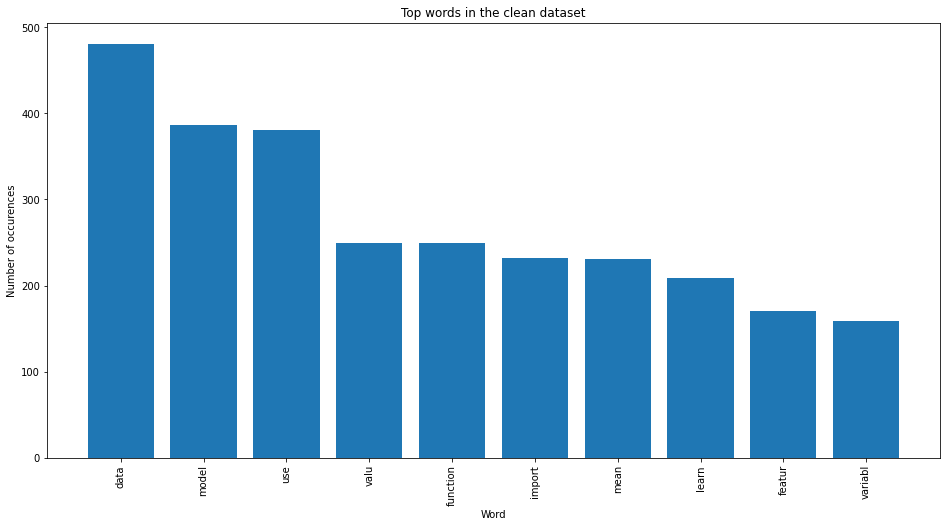

In [230]:
# Ploting top words in the entire dataset
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=10,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=data_science_df_clean['documents'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in the clean dataset')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

## **5. Preparation of Input Data**

In [231]:
# Document processing
data_science_df_clean['documents_processed'] = data_science_df_clean['documents'].apply(text_process)

In [232]:
data_science_df_clean.head(2)

,documents,documents_processed
0,Python language was created in 1991\n\nLike an...,python languag creat 1991 like comput program ...
1,There are 32 keywords in C++ and 35 keywords i...,32 keyword c 35 keyword python python keyword ...


In [233]:
# vectorization of documents
count_vectorizer = CountVectorizer(stop_words='english', max_features=4000)

text_sample = data_science_df_clean.documents_processed.values

print('Document before vectorization: {}'.format(text_sample[0]))

document_term_matrix = count_vectorizer.fit_transform(text_sample)

print('Document after vectorization: \n{}'.format(document_term_matrix[0]))

Document before vectorization: python languag creat 1991 like comput program languag python token smallest meaning part statementexpress command keyword basic word languag identifi programm defin word program liter data data structur punctuat etc oper
Document after vectorization: 
  (0, 2432)	2
  (0, 1786)	3
  (0, 1101)	1
  (0, 95)	1
  (0, 1848)	1
  (0, 1036)	1
  (0, 2350)	2
  (0, 3416)	1
  (0, 2986)	1
  (0, 1989)	1
  (0, 3109)	1
  (0, 1018)	1
  (0, 1744)	1
  (0, 700)	1
  (0, 3795)	2
  (0, 1623)	1
  (0, 2351)	1
  (0, 1167)	1
  (0, 1894)	1
  (0, 1135)	2
  (0, 3191)	1
  (0, 2396)	1
  (0, 2174)	1


# **Building of Topic Model**

Building LDA model with sklearn and hyperparameter tuning

In [234]:
lda = LatentDirichletAllocation()

grid_params={'n_components': list(range(5,10)), 'learning_decay': [.5, .7, .9]}

lda_model = GridSearchCV(lda,param_grid=grid_params)

lda_model.fit(document_term_matrix)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 6, 7, 8, 9]})

Let's see the best topic model and its parameters

In [235]:
# Best Model
best_lda_model = lda_model.best_estimator_

# Model Parameters
print("Best Model's Params: ", lda_model.best_params_)

# Perplexity
print("Model Perplexity: ", round(best_lda_model.perplexity(document_term_matrix),2))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 5}
Model Perplexity:  1538.45


Let's visualize the LDA model with pyLDAvis

In [236]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix,count_vectorizer,mds='tsne')
lda_panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      150.222153  -72.269554       1        1  24.419574
4       51.163364 -159.968018       2        1  20.642072
1      -73.144554   21.523815       3        1  20.064663
2      -66.410133 -110.606438       4        1  17.616978
0       54.417324   12.443444       5        1  17.256714, topic_info=         Term        Freq       Total Category  logprob  loglift
2035    model  342.000000  342.000000  Default  30.0000  30.0000
3300     tabl  107.000000  107.000000  Default  29.0000  29.0000
1796    layer  108.000000  108.000000  Default  28.0000  28.0000
2340  probabl  128.000000  128.000000  Default  27.0000  27.0000
3662   vector  109.000000  109.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
3520     type   26.308011   74.910439   Topic5  -5.2767   0.7105
2156   object   22.328245   53.072143   Topic5  -5.4407   0.8912
3625     valu   30.272640  219.938583   Topic5  -5.1363  -0.2261
1635   import   23.571472  207.888677   Topic5  -5.3865  -0.4200
2247  perform   20.688254   83.951059   Topic5  -5.5170   0.3563

[355 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
73        5  0.941381     16
105       3  0.815098     1d
131       3  0.815103    1x1
219       4  0.914525     34
241       3  0.815107    3x3
...     ...       ...    ...
3795      4  0.699267   word
3831      3  0.951327     x1
3836      3  0.927670     x2
3885      4  0.914525  xtest
3927      3  0.815105   yolo

[660 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 3, 1])

Let's see the dominant topic in each document

In [237]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(document_term_matrix) # Takes word presence embeding as input and gives contextual embedding as output

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data_science_df_clean['documents']))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.010000,0.010000,0.470000,0.010000,0.510000,4
Doc1,0.010000,0.010000,0.010000,0.970000,0.010000,3
Doc2,0.030000,0.030000,0.030000,0.030000,0.880000,4
Doc3,0.010000,0.950000,0.010000,0.010000,0.010000,1
Doc4,0.010000,0.010000,0.090000,0.010000,0.880000,4
Doc5,0.010000,0.600000,0.010000,0.380000,0.010000,1
Doc6,0.010000,0.010000,0.010000,0.010000,0.960000,4
Doc7,0.010000,0.010000,0.480000,0.010000,0.480000,2
Doc8,0.020000,0.280000,0.020000,0.020000,0.660000,4
Doc9,0.020000,0.020000,0.020000,0.020000,0.930000,4


Review topics distribution across documents

In [238]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,3,340
1,4,320
2,1,267
3,0,239
4,2,217


Let's see the Topic’s keywords

In [239]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = count_vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000000,000001,001,001z,0025n1,005,01,012,...,μ1,μ2,μ2sp,σ1,σ12σ22,σ2,σ2n,σp,σytest,σz
Topic0,0.200003,0.200003,0.200002,0.200002,0.200002,0.200007,0.200009,0.204464,0.200001,0.200004,...,0.200002,0.200002,0.200005,0.200003,0.200005,0.200004,0.200001,0.200002,0.200002,0.200001
Topic1,1.199691,0.208203,0.200001,0.200001,0.200002,0.205114,0.210894,0.200726,1.198673,0.202147,...,3.198672,2.199994,0.213656,4.199749,1.199981,9.017811,1.199997,1.199994,0.201201,0.200825
Topic2,0.200003,0.200003,0.200002,0.200002,0.200002,0.200006,0.200008,3.190740,0.200002,0.200004,...,0.201323,0.200002,1.186331,0.200002,0.200005,0.201732,0.200001,0.200002,0.200002,0.200001
Topic3,2.200300,1.189311,0.200001,0.200001,1.199993,1.194867,1.189081,0.200002,0.201323,1.191830,...,0.200001,0.200001,0.200004,0.200002,0.200004,0.200969,0.200001,0.200001,1.198794,2.199171
Topic4,0.200003,0.202481,1.199994,1.199994,0.200002,0.200006,0.200008,0.204069,0.200001,0.206015,...,0.200002,0.200001,0.200005,0.200245,0.200004,2.379484,0.200001,0.200002,0.200002,0.200001


Get the top 15 keywords each topic

In [240]:
# Show top n keywords for each topic
def show_topics(vectorizer=count_vectorizer, lda_model=best_lda_model, n_words=15):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=count_vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,tabl,file,data,use,imag,creat,code,docker,databas,python,column,instal,indic,contain,select
Topic 1,layer,mean,vector,valu,sampl,matrix,input,use,data,network,output,function,return,featur,multipl
Topic 2,model,train,learn,word,data,featur,use,applic,network,node,ml,machin,like,comput,make
Topic 3,import,model,data,learn,function,use,cluster,algorithm,linear,weight,differ,experi,regress,predict,problem
Topic 4,probabl,variabl,data,list,set,random,distribut,use,valu,function,matrix,number,column,plot,mean


# **Building of Question-Answering Model**

In [241]:
# Taking question as user input
question="TfidfVectorizer?"
question_processed = text_process(question)
question_processed

'tfidfvector'

In [242]:
# Appending question in the dataset to match the dimension of question and document vector
data_science_df_clean=data_science_df_clean[(data_science_df_clean.documents!=data_science_df_clean.documents_processed)]
data_science_df_clean.loc[(data_science_df_clean.index.max()+1)] = question_processed
data_science_df_clean.tail(2)

,documents,documents_processed
1382,Audio Data for Trigger word detection\n\ne.g. ...,audio data trigger word detect eg alexa okay g...
1383,tfidfvector,tfidfvector


In [243]:
# vectorization of text samples
count_vectorizer_model = CountVectorizer(stop_words='english', max_features=4000) # Downloading pre-trained vectorization model (CountVectorizer)
document_term_matrix = count_vectorizer_model.fit_transform(data_science_df_clean.documents_processed.values)
print('Document after vectorization: \n{}'.format(document_term_matrix[-1:])) # Checking the vector for the question

Document after vectorization: 
  (0, 3372)	1


CountVec and Question-Answering Model

In [244]:
# Checking the answering ability with score by hugging face 'question-answering' model

In [245]:
question='what is the daily task of a data scientist?'
context='the task of human being is to be honest.'
ans = ques_ans_pipeline(question=question, context=context)
print(ans)

{'score': 0.5999396443367004, 'start': 33, 'end': 39, 'answer': 'honest'}


In [246]:
question='what is the daily task of a data scientist'
context='the role of data scientist is to analyse data.'
ans = ques_ans_pipeline(question=question, context=context)
print(ans)

{'score': 0.485635370016098, 'start': 30, 'end': 45, 'answer': 'to analyse data'}


Thus, bad question, context pair gives bad result by 'question-answering' model 

In [247]:
# CountVec question-answering model
topic_match=[]
short_answer_dict={}
long_answer_dict={}
vec_1=document_term_matrix[-1:]     # Question vector

for k in range(len(data_science_df_clean.documents[:-1])):
  vec_2=document_term_matrix[k:(k+1)]     # Individual document vector
  topic_match.append(cosine_similarity(vec_1 , vec_2)[0][0])
  
try:
  
  if max(topic_match)==0:
    print("Sorry ! I have no experience for this question.")
            
  else:
    for i in topic_match:
      if i>0.7*max(topic_match): # Deciding the margins through hit and trial for perfect answer
        context=data_science_df_clean.documents[topic_match.index(i)]
        ans = ques_ans_pipeline(question=question, context=context)
        short_answer_dict[ans['score']] =ans['answer']
        long_answer_dict[ans['score']]=data_science_df_clean.documents[topic_match.index(i)]
                 
    if max(list(short_answer_dict.keys()))>0.01: # Deciding the margins through hit and trial for perfect answer
      print(f"Long Answer:\n{long_answer_dict.get(max(list(long_answer_dict.keys())))}")
    elif min(list(long_answer_dict.keys()))!=max(list(long_answer_dict.keys())):
      print(f"MAY BE WORTH READING...\n{long_answer_dict.get(min(list(long_answer_dict.keys())))}")
      print(short_answer_dict)
      
    else:
      print("Sorry ! I have no experience for this question.")
      print(short_answer_dict)  
  
except:
  print("There is an exception")
  print(topic_match)  

Long Answer:
Implementation of SVD

from sklearn.feature_extraction.text import TfidfVectorizer

from scipy.sparse.linalg import svds


In [248]:
# 'glove-wiki-gigaword-300' word embeddings are not able to convert all the words of our dataset. Thus not used.

TFIDF and Question-Answering Model

In [249]:
# vectorization of text samples
tfidf_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 10)
document_tfidf_matrix=tfidf_vectorizer.fit_transform(data_science_df_clean.documents_processed.values)
print(f"Document after vectorization: \n{document_tfidf_matrix.todense()}") # Checking the vector for the question

Document after vectorization: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [250]:
# tfidf question-answering model
topic_match=[]
short_answer_dict={}
long_answer_dict={}
vec_1=document_tfidf_matrix[-1:]     # Question vector

for k in range(len(data_science_df_clean.documents[:-1])):
  vec_2=document_tfidf_matrix[k:(k+1)]     # Individual document vector
  topic_match.append(cosine_similarity(vec_1 , vec_2)[0][0])
  
try:
  
  if max(topic_match)==0:
    print("Sorry ! I have no experience for this question.")
            
  else:
    for i in topic_match:
      if i>0.7*max(topic_match): # Deciding the margins through hit and trial for perfect answer
        context=data_science_df_clean.documents[topic_match.index(i)]
        ans = ques_ans_pipeline(question=question, context=context)
        short_answer_dict[ans['score']] =ans['answer']
        long_answer_dict[ans['score']]=data_science_df_clean.documents[topic_match.index(i)]
                 
    if max(list(short_answer_dict.keys()))>0.01: # Deciding the margins through hit and trial for perfect answer
      print(f"Long Answer:\n{long_answer_dict.get(max(list(long_answer_dict.keys())))}")
    elif min(list(long_answer_dict.keys()))!=max(list(long_answer_dict.keys())):
      print(f"MAY BE WORTH READING...\n{long_answer_dict.get(min(list(long_answer_dict.keys())))}")
      print(short_answer_dict)
      
    else:
      print("Sorry ! I have no experience for this question.")
      print(short_answer_dict)  
  
except:
  print("There is an exception")
  print(topic_match)  

Sorry ! I have no experience for this question.


Here, countvec question-answering model is giving better answer than tfidf model

LDA and Question-Answering Model

In [251]:
document_lda_matrix=best_lda_model.transform(document_term_matrix)
document_lda_matrix[0]

array([0.00692576, 0.00673997, 0.47267711, 0.00684419, 0.50681298])

In [252]:
# LDA question-answering model
topic_match=[]
short_answer_dict={}
long_answer_dict={}
vec_1=document_lda_matrix[-1:]     # Question vector

for k in range(len(data_science_df_clean.documents[:-1])):
  vec_2=document_lda_matrix[k:(k+1)]     # Individual document vector
  topic_match.append(cosine_similarity(vec_1 , vec_2)[0][0])
  
try:
  
  if max(topic_match)==0:
    print("Sorry ! I have no experience for this question.")
            
  else:
    for i in topic_match:
      if i>0.7*max(topic_match): # Deciding the margins through hit and trial for perfect answer
        context=data_science_df_clean.documents[topic_match.index(i)]
        ans = ques_ans_pipeline(question=question, context=context)
        short_answer_dict[ans['score']] =ans['answer']
        long_answer_dict[ans['score']]=data_science_df_clean.documents[topic_match.index(i)]
                 
    if max(list(short_answer_dict.keys()))>0.01: # Deciding the margins through hit and trial for perfect answer
      print(f"Long Answer:\n{long_answer_dict.get(max(list(long_answer_dict.keys())))}")
    elif min(list(long_answer_dict.keys()))!=max(list(long_answer_dict.keys())):
      print(f"MAY BE WORTH READING...\n{long_answer_dict.get(min(list(long_answer_dict.keys())))}")
      print(short_answer_dict)
      
    else:
      print("Sorry ! I have no experience for this question.")
      print(short_answer_dict)  
  
except:
  print("There is an exception")
  print(topic_match)  

Long Answer:
some popular categories of Python modules are 1. operating system
2. math
3. time
4. data visualization 


Here, countvec question-answering model is also giving better answer than lda model

In [253]:
# from transformers import BertForQuestionAnswering, AutoTokenizer

# modelname = 'deepset/bert-base-cased-squad2'

# model = BertForQuestionAnswering.from_pretrained(modelname)
# tokenizer = AutoTokenizer.from_pretrained(modelname)

In [254]:
# import streamlit as st
# from transformers import pipeline

# @st.cache(allow_output_mutation=True)
# def load_qa_model():
#     model = pipeline("question-answering")
#     return model

# qa = load_qa_model()
# st.title("Ask Questions about your Text")
# sentence = st.text_area('Please paste your article :', height=30)
# question = st.text_input("Questions from this article?")
# button = st.button("Get me Answers")
# max = st.sidebar.slider('Select max', 50, 500, step=10, value=150)
# min = st.sidebar.slider('Select min', 10, 450, step=10, value=50)
# do_sample = st.sidebar.checkbox("Do sample", value=False)
# with st.spinner("Discovering Answers.."):
#     if button and sentence:
#         answers = qa(question=question, context=sentence)
#         st.write(answers['answer'])

# **Conclusion**